In [ ]:
#Import required libraries
import numpy as np
import pandas as pd
%pip install seaborn
import seaborn as sns
from matplotlib import pyplot as plt

# New Section

In [20]:
df=pd.read_csv('Walmart DataSet.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [21]:
df['Date']=pd.to_datetime(df['Date'])
df['year']=df['Date'].dt.year
df['week']=df['Date'].dt.week
df['month']=df['Date'].dt.month
df.set_index('Date',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6435 entries, 2010-05-02 to 2012-10-26
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   year          6435 non-null   int64  
 8   week          6435 non-null   int64  
 9   month         6435 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 553.0 KB


<ipython-input-21-c4b6cefb45f0>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date']=pd.to_datetime(df['Date'])
<ipython-input-21-c4b6cefb45f0>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week']=df['Date'].dt.week


In [ ]:
#check if any null values in data set
df.isnull().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
year            0
week            0
month           0
dtype: int64

In [ ]:
# check if any duplicated rows are there in dataset
df.duplicated().sum()

0

Text(0.5, 1.0, 'Weekly_sales box plot')

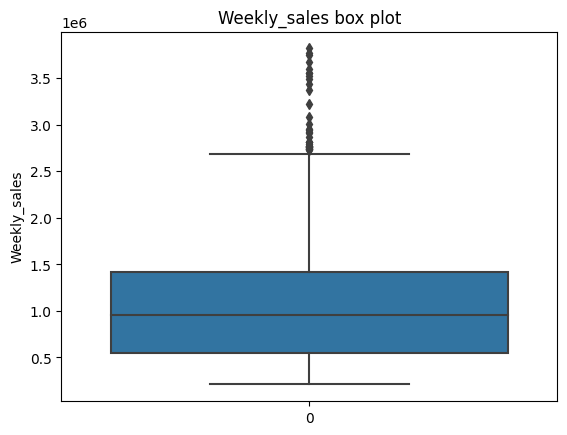

In [ ]:
sns.boxplot(df['Weekly_Sales'])
plt.ylabel('Weekly_sales')
plt.title('Weekly_sales box plot')

In [22]:
# Handling outlier
q1=df['Weekly_Sales'].quantile(0.25)
q3=df['Weekly_Sales'].quantile(0.75)
iqr=q3-q1
threshold=1.5*iqr
df=df[(df['Weekly_Sales']>q1-threshold)&(df['Weekly_Sales']<q3+threshold)]

In [ ]:
sns.boxplot(df['Weekly_Sales'])
plt.ylabel('Weekly_sales')
plt.title('Weekly_sales box plot')

Text(0.5, 1.0, 'Weekly_sales box plot')

⚡----------------------------
1.A.Answer-> for some stores there is a correlation bw unemployment and weekly_sales either positive or negative correlation.mostly affected stores are listed below([36, 38, 44, 4, 35, 13, 39, 42, 41, 14])

Text(0.5, 1.0, 'correlation between unemploment and sales for different stores')

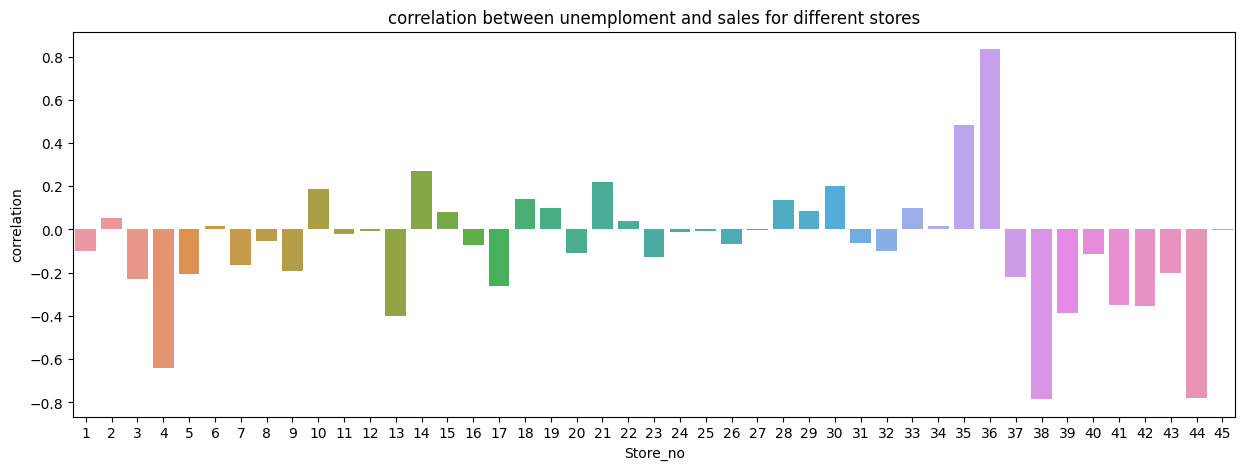

In [ ]:
lst1=[]
for i in df.Store.unique():
    lst1.append(df[df['Store']==i][['Weekly_Sales','Unemployment']].corr().iloc[0,1])
se=pd.Series(lst1,index=df.Store.unique())
plt.figure(figsize=(15,5))
sns.barplot(x=se.index,y=se.values)
plt.xlabel('Store_no')
plt.ylabel('correlation')
plt.title('correlation between unemploment and sales for different stores')


In [ ]:
# consider magnitude of corr values
for i in range(1,len(se)+1):
    if se[i]<0:
        se[i]=se[i]*(-1)
# top 10 stores sales affected by unemployment
corr_df=pd.DataFrame(se,columns=['correlation'])
corr_df.index.name='Strone_no'
sorted_corr_df=corr_df.sort_values(by='correlation',ascending=False).iloc[:10,:]
print('List of top 10 affted stores: ',sorted_corr_df.index)
print(sorted_corr_df)

List of top 10 affted stores:  Int64Index([36, 38, 44, 4, 35, 13, 39, 42, 41, 14], dtype='int64', name='Strone_no')
           correlation
Strone_no             
36            0.833734
38            0.785290
44            0.780076
4             0.639563
35            0.483865
13            0.400254
39            0.384681
42            0.356355
41            0.350630
14            0.269510


⚡-----------------1.B. Seasonality is present in the data set in year end. Holiday flag also shows some affect on sales

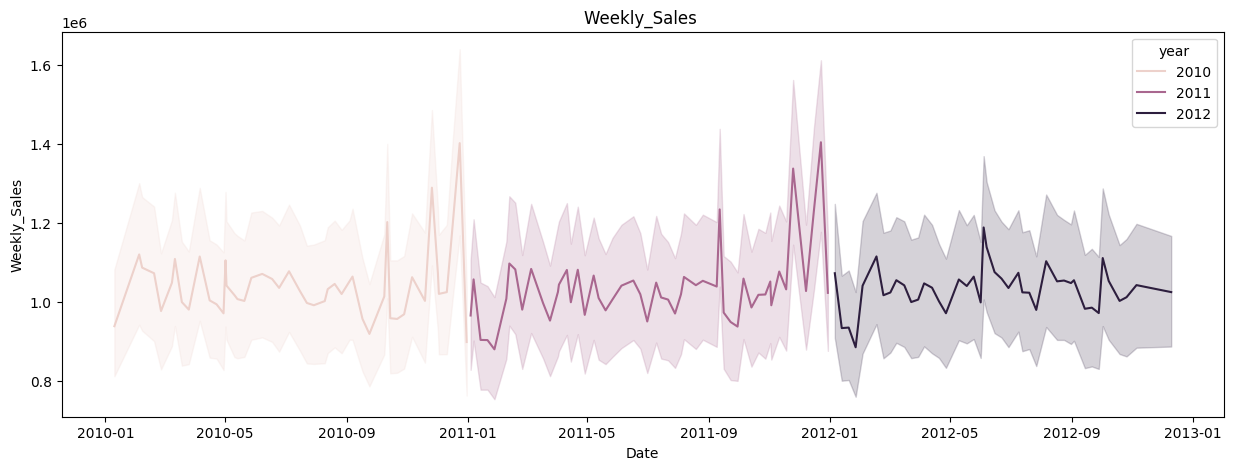

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df.index,y=df['Weekly_Sales'],hue=df['year'])
plt.title('Weekly_Sales ')
plt.show()

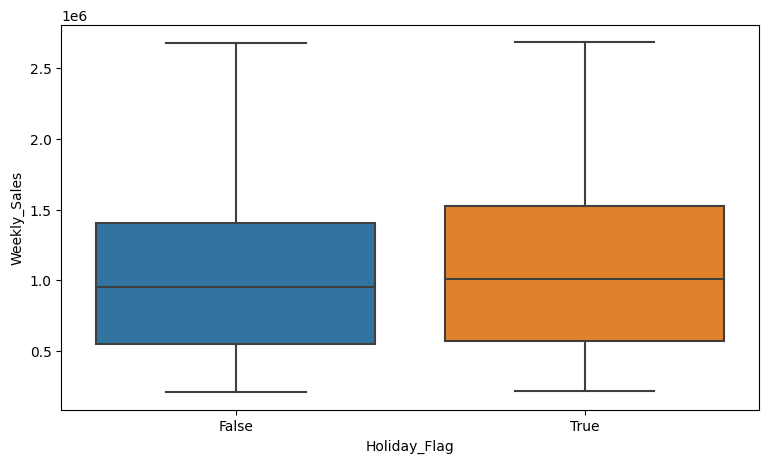

In [ ]:
# impact of holidays on weekly sales
plt.figure(figsize = (9,5))
sns.boxplot(x = 'Holiday_Flag', y ='Weekly_Sales', data = df)
# Mapping 0 to False and 1 to True in x-axis labels
plt.xticks([0, 1], ['False', 'True'])
plt.show()

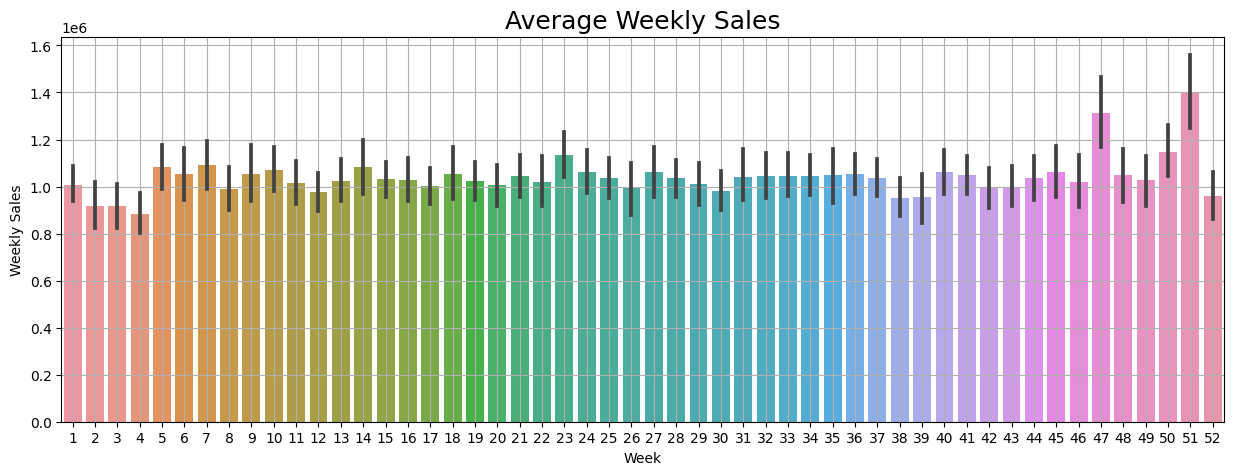

In [ ]:
#Lets visualize the average weekly_sales for all stores and any year
plt.figure(figsize=(15,5))
sns.barplot(x='week',y='Weekly_Sales',data=df)
plt.title('Average Weekly Sales', fontsize=18)
plt.ylabel('Weekly Sales')
plt.xlabel('Week')
plt.grid()
plt.show()

⚡----------------------1.C. Correlation between Weekly_Sales and Temperature

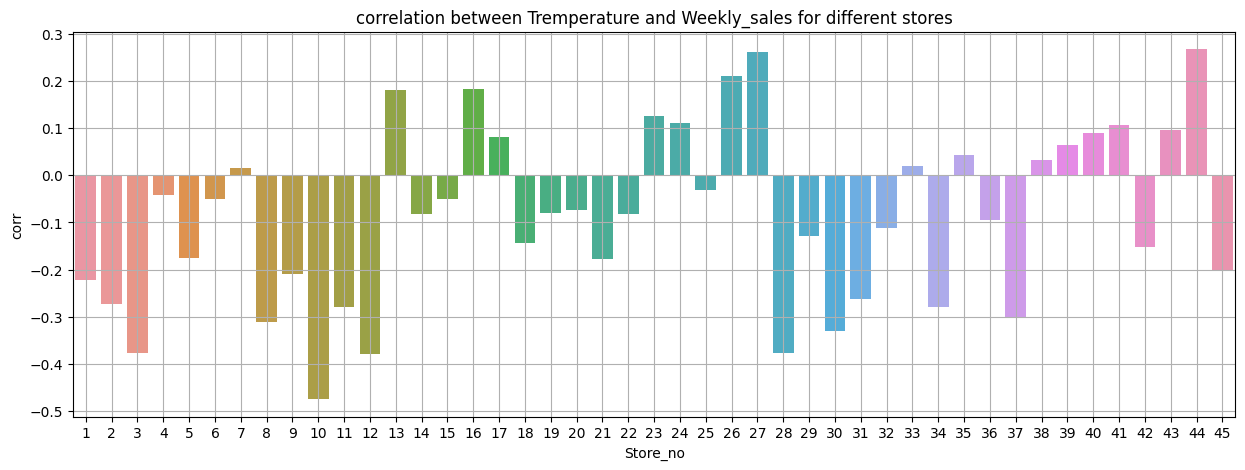

In [ ]:
# find the correlation between temperature and sales for different stores
lst1=[]
for i in df.Store.unique():
    lst1.append(df[df['Store']==i][['Weekly_Sales','Temperature']].corr().iloc[0,1])
se=pd.Series(lst1,index=df.Store.unique())
plt.figure(figsize=(15,5))
sns.barplot(x=se.index,y=se.values)
plt.xlabel('Store_no')
plt.ylabel('corr')
plt.title('correlation between Tremperature and Weekly_sales for different stores')
plt.grid()
plt.show()

Text(0.5, 1.0, 'Store_44')

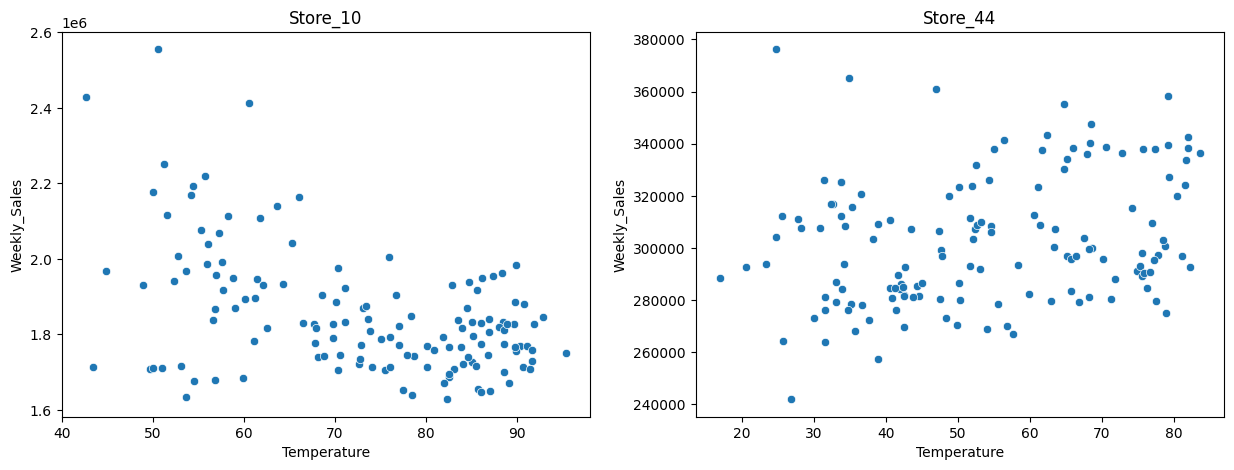

In [ ]:
# as we see the stores 3,10,12,29,44...  has some correlation lets do scatter plot for them
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df_store_10=df[df['Store']==10]
sns.scatterplot(x=df_store_10['Temperature'],y=df_store_10['Weekly_Sales'])
plt.title('Store_10')

plt.subplot(1,2,2)
df_store_44=df[df['Store']==44]
sns.scatterplot(x=df_store_44['Temperature'],y=df_store_44['Weekly_Sales'])
plt.title('Store_44')

⚡-------------------1.D.find the correlation between CPI and sales for different stores


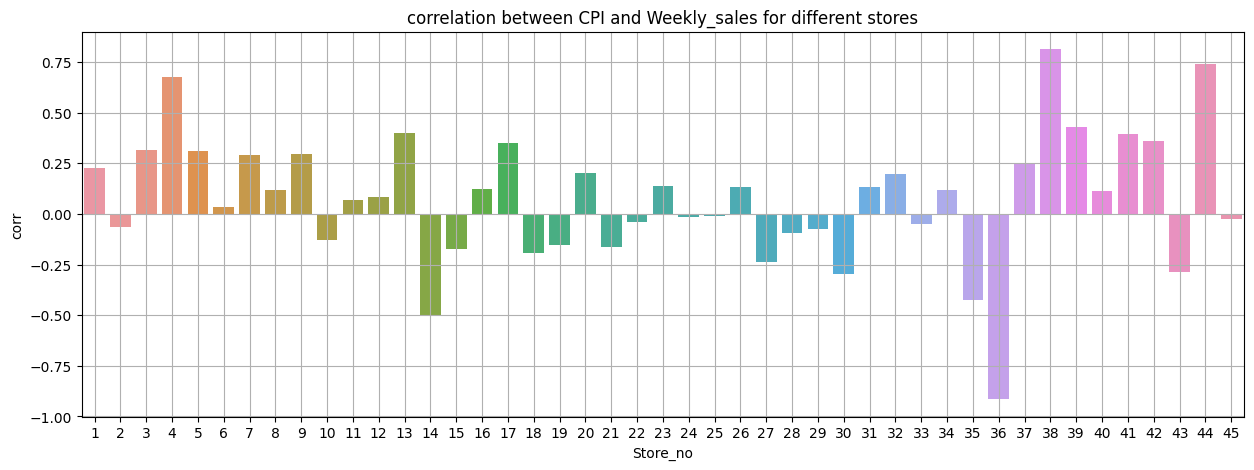

In [ ]:
lst1=[]
for i in df.Store.unique():
    lst1.append(df[df['Store']==i][['Weekly_Sales','CPI']].corr().iloc[0,1])
se=pd.Series(lst1,index=df.Store.unique())
plt.figure(figsize=(15,5))
sns.barplot(x=se.index,y=se.values)
plt.xlabel('Store_no')
plt.ylabel('corr')
plt.title('correlation between CPI and Weekly_sales for different stores')
plt.grid()
plt.show()

Text(0.5, 1.0, 'Store_38')

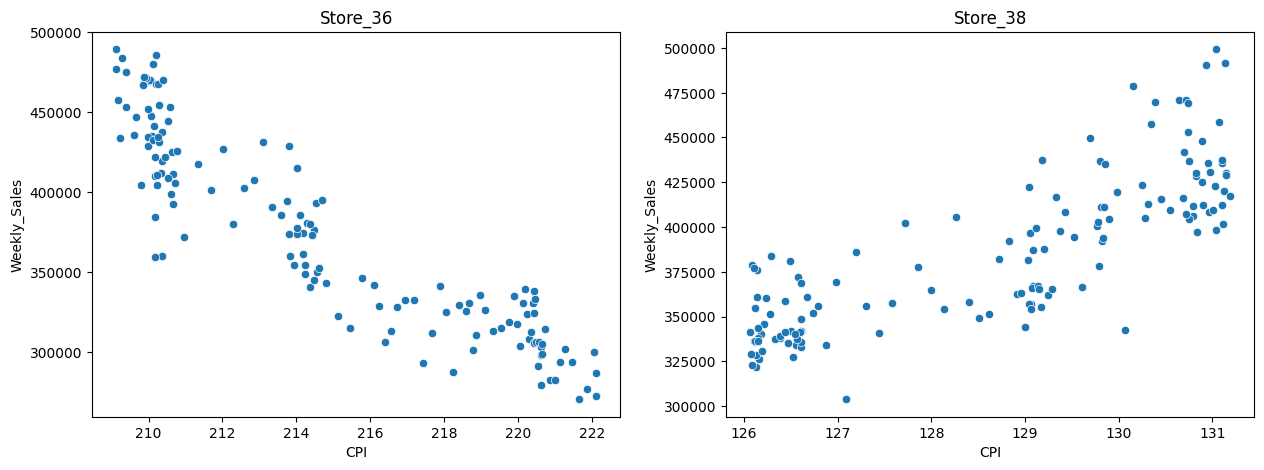

In [ ]:
# as we see the stores 35,38...  has some correlation lets do scatter plot for them
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df_store_36=df[df['Store']==36]
sns.scatterplot(x=df_store_36['CPI'],y=df_store_36['Weekly_Sales'])
plt.title('Store_36')

plt.subplot(1,2,2)
df_store_38=df[df['Store']==38]
sns.scatterplot(x=df_store_38['CPI'],y=df_store_38['Weekly_Sales'])
plt.title('Store_38')

⚡-------------------1.E.Top Performing stores

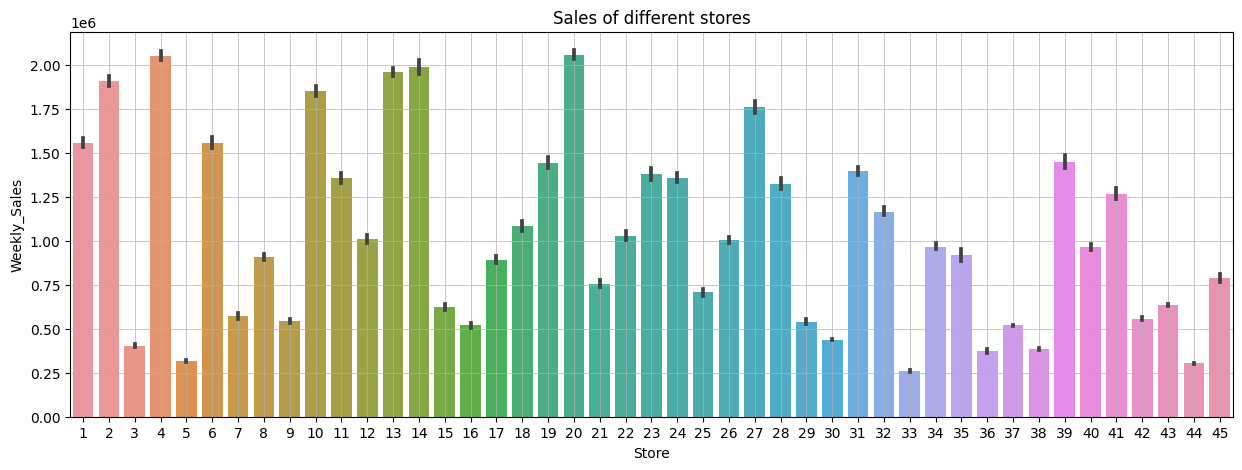

In [ ]:
# bar plot on sales for all stores
plt.figure(figsize=(15,5))
sns.barplot(x='Store',y='Weekly_Sales',data=df)
plt.title('Sales of different stores')
plt.grid(linewidth=0.5)

In [ ]:
#top 10 best performed stores
ser=df.groupby(by='Store')['Weekly_Sales'].mean()
sorted_ser=ser.sort_values(ascending=False)
print('Top 10 best performed stores:')
print(list(sorted_ser.index[:10]))

Top 10 best performed stores:
[20, 4, 14, 13, 2, 10, 27, 6, 1, 39]


⚡-------------1.F. List of 10 worst performed Stores------------------------------------------------------------------------------------------------------------------------



In [ ]:
#top 10 best performed stores
ser=df.groupby(by='Store')['Weekly_Sales'].mean()
sorted_ser=ser.sort_values(ascending=True)
print('List of 10 Worst performed stores:')
print(list(sorted_ser.index[:10]))

List of 10 Worst performed stores:
[33, 44, 5, 36, 38, 3, 30, 37, 16, 29]


In [ ]:
#significant is the difference between the highest and lowest performing stores.
highest_sale_of_a_store=df.groupby(by='Store')['Weekly_Sales'].mean().sort_values(ascending=False).values[0]
lowest_sale_of_a_store=df.groupby(by='Store')['Weekly_Sales'].mean().sort_values(ascending=True).values[0]

print('highest_sale_of_a_store:',np.round(highest_sale_of_a_store,2))
print('lowest_sale_of_a_store:',np.round(lowest_sale_of_a_store,2))
print('')
print('the difference between the highest and lowest performing stores: ')
print(np.round(highest_sale_of_a_store-lowest_sale_of_a_store,2))

highest_sale_of_a_store: 2058998.05
lowest_sale_of_a_store: 259861.69

the difference between the highest and lowest performing stores: 
1799136.36


 ⚡----------------------------Using Sarimax model for forcasting the future sales for store 1-----------------------------------------------------------------------------------------

In [ ]:
#Import libraries for Time series
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
!pip install pmdarima
import pmdarima as pmd

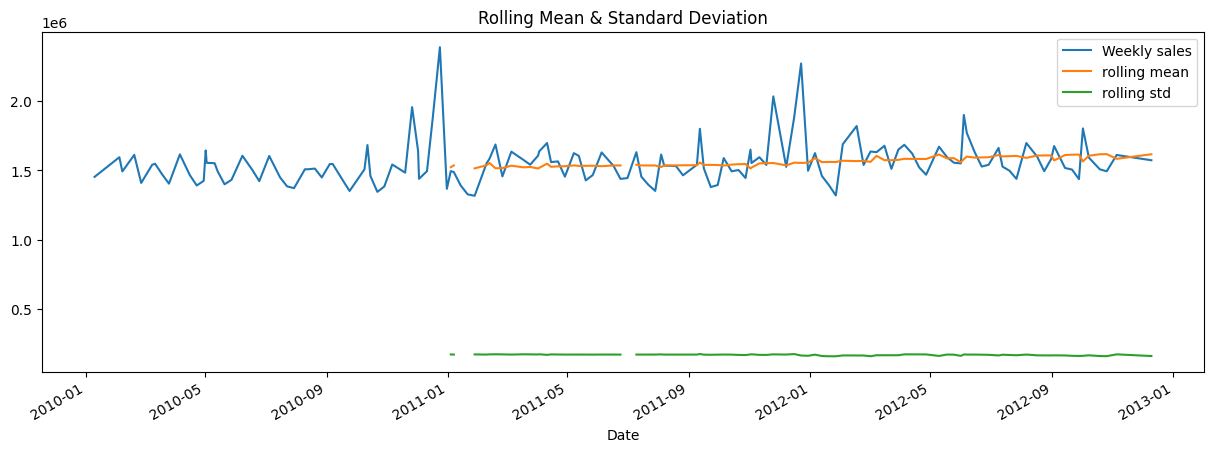

In [30]:
# for store 1
plt.figure(figsize=(15,5))
store_01=df[df['Store']==1]['Weekly_Sales']
mean=store_01.rolling(52).mean()
std=store_01.rolling(52).std()
store_01=store_01.sort_index()
store_01.plot()
mean.plot()
std.plot()
plt.legend(labels=['Weekly sales','rolling mean','rolling std'])
plt.title('Rolling Mean & Standard Deviation')
store_01=store_01.dropna()

In [28]:
#Check the stationarity of the data
results=adfuller(store_01)
print("P-Values: ",results[1])

P-Values:  1.981888230415561e-16


In [25]:
# Using Auto arima for P,d,q parameters
model=pmd.auto_arima(store_01)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  143
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -1912.789
Date:                Tue, 16 Jan 2024   AIC                           3831.578
Time:                        18:09:35   BIC                           3840.446
Sample:                             0   HQIC                          3835.182
                                - 143                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5923      0.039    -15.200      0.000      -0.669      -0.516
ma.L2         -0.3195      0.050     -6.387      0.000      -0.418      -0.221
sigma2      2.808e+10   4.59e-13   6.12e+22      0.000    2.81e+10    2.81e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                73.91
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.56   Skew:                             1.12
Prob(H) (two-sided):                  0.05   Kurtosis:                         5.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.2e+39. Standard errors may be unstable.
"""

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate st

Text(0.5, 1.0, 'Weekly sales forecast for store 1')

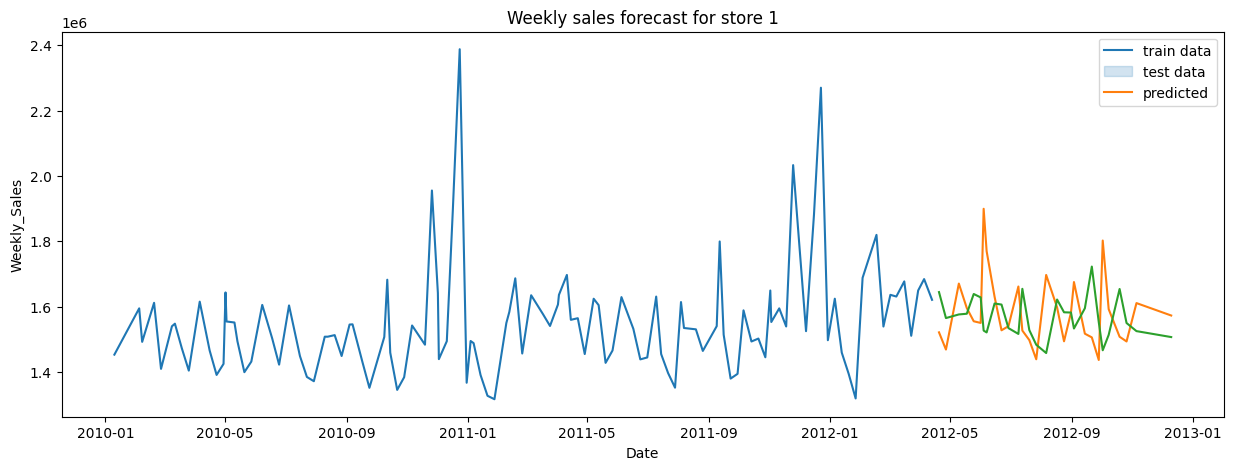

In [34]:
#forecasting the future sales with sarimax model with seasinality as 52
train=store_01[:int(0.8*len(store_01))]
test=store_01[int(0.8*len(store_01)):]
model=SARIMAX(train,order=(0,1,2),seasonal_order=(0,1,2,52))
model_fit=model.fit()
pre=model_fit.predict(start=int(0.8*len(store_01)),end=len(store_01)-1)
pre.index=test.index

plt.figure(figsize=(15,5))
sns.lineplot(train)
sns.lineplot(test)
sns.lineplot(pre)
plt.legend(loc='best',labels=['train data','test data','predicted'])
plt.title('Weekly sales forecast for store 1')